   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

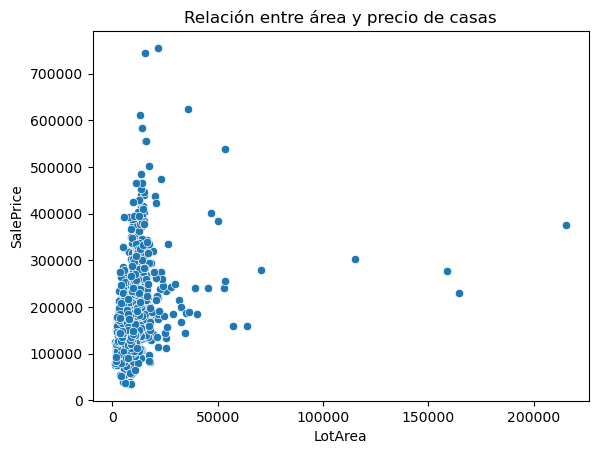

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#EXPLORACIÓN DE DATOS

#cargar datos
df = pd.read_csv('C:/Users/Marta/Anaconda-Projects/Precios Casas/data/train.csv')

print(df.head())
#limpieza de datos
df = df.dropna(subset=['LotArea', 'SalePrice'])

#Análisis visual
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Relación entre área y precio de casas')
plt.show()

In [19]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import load_model

#MODELADO PREDICTIVO

#Cargar datos
df=pd.read_csv('C:/Users/Marta/Anaconda-Projects/Precios Casas/data/train.csv')

# Paso 2: Selección de características y objetivo
X = df[['LotArea', 'OverallQual', 'YearBuilt']]  # Características
y = df['SalePrice']  # Variable objetivo

# Paso 3: Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Una salida para predicción de precios
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Paso 6: Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

if not os.path.exists('models'):
    os.makedirs('models')

# Paso 7: Guardar el modelo
model.save('models/house_price_model.keras')
print("Modelo guardado en 'models/house_price_model.keras'")

import os
print("Ruta actual:", os.getcwd())

# Verifica si el archivo fue guardado
if os.path.exists('models/house_price_model.keras'):
    print("El modelo se guardó correctamente.")
else:
    print("El modelo no se guardó.")

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 38845521920.0000 - val_loss: 39653720064.0000
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39768866816.0000 - val_loss: 39653027840.0000
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39833542656.0000 - val_loss: 39651094528.0000
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37237305344.0000 - val_loss: 39647125504.0000
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39435575296.0000 - val_loss: 39639986176.0000
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39209869312.0000 - val_loss: 39628558336.0000
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37988499456.0000 - val_loss: 39611953152.0000
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39462285312.0000 - val_loss: 39588454400.0000
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36467142656.0000 - val_loss: 39558234112.0000
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40

In [5]:
import os
print(os.getcwd())

C:\Users\Marta\Anaconda-Projects\Precios Casas


In [21]:
os.chdir('C:/Users/Marta/Anaconda-Projects/Precios Casas')
!pip freeze > requirements.txt

In [22]:
with open('requirements.txt', 'r') as file:
    content = file.read()
    print(content)

absl-py==2.1.0
aext-assistant @ file:///C:/b/abs_7e0qjcige6/croot/aext-assistant_1717062202219/work
aext-assistant-server @ file:///C:/b/abs_261y2c9vsm/croot/aext-assistant-server_1717060019302/work
aext-core @ file:///C:/b/abs_1e882xlg8y/croot/aext-core_1717056431204/work
aext-core-server @ file:///C:/b/abs_24av6ljtvu/croot/aext-core-server_1717075079138/work
aext-panels @ file:///C:/b/abs_44bc4hv663/croot/aext-panels_1717062218055/work
aext-panels-server @ file:///C:/b/abs_7f9_48fhp3/croot/aext-panels-server_1717060738001/work
aext-share-notebook @ file:///C:/b/abs_4bhc14ko2x/croot/aext-share-notebook_1717059348177/work
aext-share-notebook-server @ file:///C:/b/abs_2b3c16a8t0/croot/aext-share-notebook-server_1717057990383/work
aext-shared @ file:///C:/b/abs_1ex0tj8g9m/croot/aext-shared_1716991146845/work
aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohttp @ file:///C:/b/abs_8860tt1424/croot/aiohttp_1715108828392/work
aioitertools @ file:///tmp/build

In [25]:
python src/model_training.py

SyntaxError: invalid syntax (656549113.py, line 1)